## Riksdagen P1204  
version 2.0

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-17 06:10:44.485961


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1081,cd44271b-5c22-4704-a91a-e4d6a95fdcbb,d7c319a0-83e4-11d4-ae60-0050040c9b55,0789353702707,2342307,1945,man,Lindberg,Mats,"Lindberg,Mats",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c319a0-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['ombuds..."
1055,ae7e4dff-2b91-403d-b290-1a89983a82af,ef9d7cad-1faa-4907-8fff-b1e92dccbcd3,0351107680112,2342900,1956,kvinna,Leissner,Maria,"Leissner,Maria",,FP,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/ef9d7cad-1faa-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
1168,a471cb43-f50d-4ebc-a3ea-5b68a92f5b21,7826c819-d0da-4e4a-a16b-ffa3d8e9b155,0274462857213,2343410,1968,man,Löberg,Petter,"Löberg,Petter",,S,Västra Götalands läns södra,Tjänstgörande riksdagsledamot,http://data.riksdagen.se/person/7826c819-d0da-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
273,ec59913f-68e4-452f-9073-e36c41d70781,86c365a5-452c-4bca-8871-45bf67a44645,0378597308227,5003697,1979,kvinna,Brodin,Camilla,"Brodin,Camilla",,KD,Stockholms län,Tjänstgörande riksdagsledamot,http://data.riksdagen.se/person/86c365a5-452c-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2006 non-null   object
 1   sourceid        2006 non-null   object
 2   intressent_id   2006 non-null   object
 3   hangar_id       2006 non-null   object
 4   fodd_ar         2006 non-null   object
 5   kon             2006 non-null   object
 6   efternamn       2006 non-null   object
 7   tilltalsnamn    2006 non-null   object
 8   sorteringsnamn  2006 non-null   object
 9   iort            2006 non-null   object
 10  parti           2006 non-null   object
 11  valkrets        2006 non-null   object
 12  status          2006 non-null   object
 13  person_url_xml  2006 non-null   object
 14  bild_url_80     2006 non-null   object
 15  bild_url_192    2006 non-null   object
 16  bild_url_max    2006 non-null   object
 17  personuppdrag   2006 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,22f337c7-c725-40a1-a54b-a45967d98de2,d7c31f87-83e4-11d4-ae60-0050040c9b55,,3057167,0,man,Andersson,Lars,"Persson,Margareta",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/fcdc158d-9f81-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,22f337c7-c725-40a1-a54b-a45967d98de2,d7c31f87-83e4-11d4-ae60-0050040c9b55,,3057167,0,man,Andersson,Lars,"Persson,Margareta",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/fcdc158d-9f81-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', '', 'KD', 'FP', '-', 'C', 'SD', 'PP', 'V',
       'NYD', 'JL', 'FI'], dtype=object)

In [10]:
df.parti.value_counts()

S      637
M      400
C      157
V      133
FP     129
MP     128
       121
KD     116
SD      90
L       45
NYD     24
-       20
JL       3
PP       2
FI       1
Name: parti, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
78,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/da0f2189-a8ae-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'en', 'uppgift': [{}], 't..."
97,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c317d9-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['byggna..."
274,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/c93800eb-8db0-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
305,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tjänstgörande riksdagsledamot,http://data.riksdagen.se/person/8340e89d-250a-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
513,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/eb4a2005-9ec1-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
580,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/a8568101-4108-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
627,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/1f0d91c1-605d-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
672,3e3a835b-632e-49bf-9cb3-2327b39dedc5,9ba9d931-c9c0-4052-8c1b-9765f09cad69,0105126451619,2369430,1953,kvinna,Hagwall,Anna,"Hagwall,Anna",,-,Västerbottens län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/9ba9d931-c9c0-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppg

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
602,58844ed2-9155-4417-9c4c-6228691b4167,bae72946-11c5-43c6-b77f-840575379156,,4788866,0,okänt,Goudin,Hélène,"Goudin,Hélène",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/bae72946-11c5-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1154,dcb35c65-7738-4096-be6f-3175054aea0f,f38c2cc2-85ce-4981-afcb-a00190b7e99b,,4788864,0,okänt,Lundgren,Nils,"Lundgren,Nils",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/f38c2cc2-85ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1930,ed021f3f-e404-4937-ba32-a8a3c1bcb133,8a8fd224-61d6-437f-b655-91f3b38986c6,,4788865,0,okänt,Wohlin,Lars,"Wohlin,Lars",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/8a8fd224-61d6-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
50,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/60f468dd-1052-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
449,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/4af0724f-02ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1468,f7082c5f-414a-4005-9e85-9f7791fbf868,df8e12a0-74e4-4af5-b568-bd708f4c2bb0,,4788846,0,kvinna,Post,Soraya,"Post,Soraya",,FI,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/df8e12a0-74e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [15]:
df.valkrets.value_counts()

                                842
Stockholms län                  145
Stockholms kommun               129
Göteborgs kommun                 61
Uppsala län                      48
Skåne läns södra                 48
Östergötlands län                44
Örebro län                       42
Hallands län                     39
Södermanlands län                38
Västra Götalands läns västra     38
Dalarnas län                     38
Värmlands län                    36
Västerbottens län                36
Västra Götalands läns norra      35
Skåne läns västra                35
Jönköpings län                   35
Västmanlands län                 33
Gävleborgs län                   32
Norrbottens län                  31
Malmö kommun                     30
Kalmar län                       29
Skåne läns norra och östra       29
Västernorrlands län              28
Västra Götalands läns östra      27
Västra Götalands läns södra      22
Kronobergs län                   19
Blekinge län                

In [16]:
df.status.value_counts()

Tidigare riksdagsledamot                                                               1032
Tjänstgörande riksdagsledamot                                                           321
Tidigare ersättare                                                                      175
Tillgänglig ersättare                                                                    77
Status saknas                                                                            23
                                                                                       ... 
Avliden  2015-07-28                                                                       1
Tidigare ordförande i Nämnden för lön till riksdagens ombudsmän och riksrevisorerna       1
Avliden  2016-12-28                                                                       1
Avliden  2015-06-22                                                                       1
Avliden  2012-10-12                                                             

In [17]:
for r,y in df.status.value_counts().iteritems():
    if r.split(" ")[0] not in "Avliden" :
        print (r,y)

Tidigare riksdagsledamot 1032
Tjänstgörande riksdagsledamot 321
Tidigare ersättare 175
Tillgänglig ersättare 77
Status saknas 23
Europaparlamentariker 21
Avgången riksdagsledamot 21
Tidigare europaparlamentariker 20
Tidigare ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 15
Tjänstgörande statsrådsersättare 14
Tidigare statsråd 13
Tidigare personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 12
Statsråd 11
Tjänstledig riksdagsledamot 10
Tjänstgörande ersättare 10
Tidigare riksrevisor i Riksrevisorerna 6
Ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 5
Tidigare justitieombudsman i Riksdagens ombudsmän 4
Personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 4
Tidigare riksrevisor med administrativt ansvar i Riksrevisorerna 3
Ställföreträdande ombudsman i Riksdagens ombudsmän 3
Justitieombudsman i Riksdagens ombudsmän 3
Ledamot i Nämnden för lön till riksdagens ombudsmän och riksrevisorerna 2
Tidigare ledamot i Nämnden för 

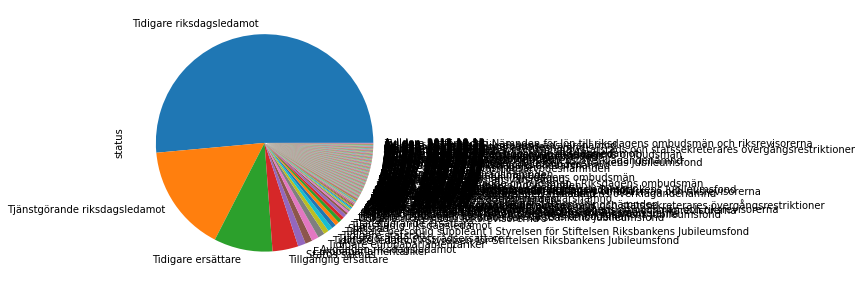

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

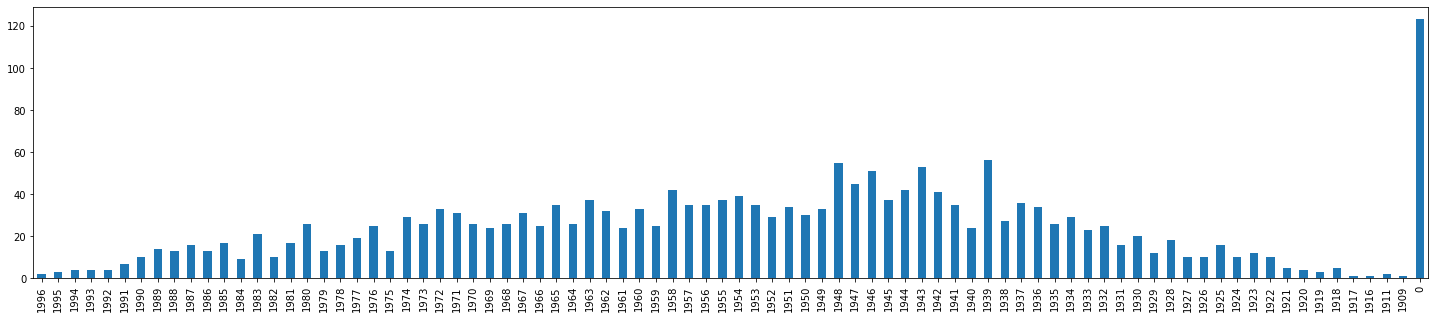

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.show()

In [20]:
df.iort.value_counts()

               1987
Stockholm         2
Röstånga          1
Linköping         1
Luleå             1
Visby             1
Simrishamn        1
Helsingborg       1
Stockaryd         1
Bengtsfors        1
Göteborg          1
Degerhamn         1
Gamleby           1
Gislaved          1
Uppsala           1
Norrhult          1
Hallsberg         1
Stjärnhov         1
Skellefteå        1
Name: iort, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     1862 non-null   object
 1   riksdagenGUID  1862 non-null   object
 2   Source         1862 non-null   object
dtypes: object(3)
memory usage: 43.8+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
1276,Q50353170,a24b37a7-5e02-4540-8353-5cc28952dc86,PropertyP8388
1396,Q4979205,09d8f370-d105-480e-ae33-c93dddf90451,PropertyP8388
1188,Q5544172,e7e4136c-b4df-11d5-8079-0040ca16072a,PropertyP8388
1565,Q5804686,d7c31b78-83e4-11d4-ae60-0050040c9b55,PropertyP8388
551,Q253640,055b6e82-a39b-4037-99bd-be4c3b1f6b09,PropertyP8388
1001,Q5956750,04ede91e-1686-429d-8847-fadb72508460,PropertyP8388
1436,Q4980351,d7c32238-83e4-11d4-ae60-0050040c9b55,PropertyP8388
100,Q4941476,c18a0773-63bd-4c20-b0d0-8249d3b22c9b,PropertyP8388
1058,Q6014287,c3870b6b-6fc8-41c8-a1e1-cb0fb9a68a2d,PropertyP8388
1181,Q5546459,43daf7a0-fee5-47b7-b572-6710cee3a0d0,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2006
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      1862 non-null   object
 1   riksdagenGUID   1862 non-null   object
 2   Source          1862 non-null   object
 3   hangar_guid     2006 non-null   object
 4   sourceid        2006 non-null   object
 5   intressent_id   2006 non-null   object
 6   hangar_id       2006 non-null   object
 7   fodd_ar         2006 non-null   object
 8   kon             2006 non-null   object
 9   efternamn       2006 non-null   object
 10  tilltalsnamn    2006 non-null   object
 11  sorteringsnamn  2006 non-null   object
 12  iort            2006 non-null   object
 13  parti           2006 non-null   object
 14  valkrets        2006 non-null   object
 15  status          2006 non-null   object
 16  person_url_xml  2006 non-null   object
 17  bild_url_80     2006 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

both              1861
Riksdagen_only     145
WD_only              1
Name: WD_Riksdagen, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [28]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1862 to 2006
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       145 non-null    object
 4   WD_Riksdagen   145 non-null    object
 5   tilltalsnamn   145 non-null    object
 6   efternamn      145 non-null    object
 7   parti          145 non-null    object
 8   fodd_ar        145 non-null    object
 9   intressent_id  145 non-null    object
dtypes: object(10)
memory usage: 12.5+ KB


In [29]:
pd.set_option('display.max_rows', None) 
#Riksdagen_only

In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1862 to 2006
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       145 non-null    object
 4   WD_Riksdagen   145 non-null    object
 5   tilltalsnamn   145 non-null    object
 6   efternamn      145 non-null    object
 7   parti          145 non-null    object
 8   fodd_ar        145 non-null    object
 9   intressent_id  145 non-null    object
 10  Riksdagen      145 non-null    object
dtypes: object(11)
memory usage: 13.6+ KB


In [31]:
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))


,efternamn,parti,tilltalsnamn,fodd_ar,intressent_id,WikidataID,Riksdagen
1969,Oretorp,C,Kristin,1975,0279385965920,NaN,link
1862,Agenberg,S,Tomas,1973,0361964723211,NaN,link
1926,Lega,KD,David,1973,0148994807513,NaN,link
1887,Etzler,V,Aron,1973,092274509611,NaN,link
1881,Edholm,M,Anders,1973,0521274429611,NaN,link
1875,Dahl,S,Cecilia,1971,0468904415516,NaN,link
1950,Mobeck,S,Pernilla,1969,048433771316,NaN,link
1871,Borg,M,Anders,1968,0958072321310,NaN,link
1916,Jonsson,KD,Lotta,1966,0355822136816,NaN,link
1967,Nylund,S,Anna-Karin,1966,019331401512,NaN,link


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

0       90
1973     4
1937     3
1942     3
1943     3
1940     3
1935     2
1958     2
1966     2
1959     2
1962     2
1965     2
1945     2
1954     2
1939     2
1961     1
1934     1
1944     1
1919     1
1953     1
1922     1
1936     1
1926     1
1947     1
1975     1
1955     1
1968     1
1941     1
1969     1
1923     1
1949     1
1931     1
1971     1
1963     1
1950     1
1928     1
Name: fodd_ar, dtype: int64

In [33]:
Riksdagen_only["parti"].value_counts() 

      94
S     19
M     11
C      7
V      5
MP     4
KD     3
-      1
SD     1
Name: parti, dtype: int64

### Check WD if we have P1214 set but not P8388 GUID

In [34]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [35]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     3 non-null      object
 1   WDriksdagenID  3 non-null      object
 2   Source         3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [36]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         3 non-null      object
 1   WDriksdagenID      3 non-null      object
 2   Source             3 non-null      object
 3   hangar_guid        2006 non-null   object
 4   sourceid           2006 non-null   object
 5   intressent_id      2006 non-null   object
 6   hangar_id          2006 non-null   object
 7   fodd_ar            2006 non-null   object
 8   kon                2006 non-null   object
 9   efternamn          2006 non-null   object
 10  tilltalsnamn       2006 non-null   object
 11  sorteringsnamn     2006 non-null   object
 12  iort               2006 non-null   object
 13  parti              2006 non-null   object
 14  valkrets           2006 non-null   object
 15  status             2006 non-null   object
 16  person_url_xml     2006 non-null   object


In [37]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

Riksdagenintressent_id_only    2006
WDP1214_only                      3
Name: WDP1214_Riksdagen, dtype: int64

In [38]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[{'sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen'}].to_html(escape=False))


,efternamn,parti,tilltalsnamn,fodd_ar,intressent_id,WikidataID,sourceid,WDP1214_Riksdagen,WDriksdagenID


In [39]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[{'WikidataID','sourceid'}].to_html(escape=False))


,sourceid,WikidataID


In [40]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-17 06:11:03.350961
Time elapsed (hh:mm:ss.ms) 0:00:18.865383
